**Meaning of Data Columns**

- SD: Sus domain i.e. words associated to hacking
- JD: Job domain i.e. words associated with job portals
- CD: Cloud domain i.e. words associated with cloud drives

- WKE: user accessed during weekends
- OWH: user accessed out of work hours (of work days)
- WH: user accessed during work hours

**Import Feature Engineered Data**
- OCEAN Personality Test
- File
- HTTP

In [1]:
import pandas as pd
data = pd.read_parquet('../data/FEData_For_Modelling.parquet').reset_index(drop = True)
data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810


Get a list of malicious users from answers dataset
- Identified in scenario 2

In [2]:
import os
malicious_filenames = os.listdir('../data/answers')
malicious_users = []

for filename in malicious_filenames:
    malicious_users.append(filename.replace('r5.2-2-', "").replace('.csv', ""))

malicious_users

['MDS0680',
 'GWG0497',
 'CKP0630',
 'HMS1658',
 'BYO1846',
 'HXP0976',
 'CIF1430',
 'ITA0159',
 'OSS1463',
 'SNK1280',
 'HIS1394',
 'SIS0042',
 'HSN0675',
 'MCP0611',
 'TNB1616',
 'CHP1711',
 'MGB1235',
 'NAH1366',
 'JAL0811',
 'OKM1092',
 'TMT0851',
 'DCC1119',
 'KSS1005',
 'VCF1602',
 'RRS0056',
 'WDT1634',
 'ICB1354',
 'ZIE0741',
 'LVF1626',
 'TRC1838']

**Add 'malicous column' to identify such users**
- 1: malicous
- 2: not malicious

In [3]:
import numpy as np

data['malicious'] = np.where(data['user'].isin(malicious_users), 1, 0)
data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246,0
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679,0
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025,0
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2,0
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494,0
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322,0
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7,0
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810,0


In [ ]:
data[data.user == 'TRC1838']

# Decision Tree / Random Forest

In [4]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = data.drop(columns = ['user', 'malicious'])
y = data.malicious

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Labels before Resampling")
print(Counter(y_train))

Train Labels before Resampling
Counter({0: 1574, 1: 26})


**SMOTE Oversampling**
- Not included for now

In [5]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(sampling_strategy = 0.3, random_state = 42) #sampling_strategy=0.8
resampled_X_train, resampled_y_train = oversample.fit_resample(X_train, y_train)

print("Train Labels after Resampling")
print(Counter(resampled_y_train))

Train Labels after Resampling
Counter({0: 1574, 1: 472})


**Feature Normalisation**

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(resampled_X_train)
X_test_scaled = scaler.transform(X_test)

y_train = resampled_y_train

**Recursive Feature Elimination + Cross Validation**
- removed for standardisation

In [ ]:
# from sklearn.feature_selection import RFECV

# # Feature Selection
# rfe = RFECV(estimator = dt, scoring = 'precision') #minimises false positives
# X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
# X_test_rfe = rfe.transform(X_test_scaled)

# print('Chosen best features by rfe:', X_train.columns[rfe.support_].tolist())
# print('Ranking of Feature Importance:', rfe.ranking_)



**Model Evaluation**

Accuracy: 96.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       396
           1       0.09      0.25      0.13         4

    accuracy                           0.97       400
   macro avg       0.54      0.61      0.56       400
weighted avg       0.98      0.97      0.97       400



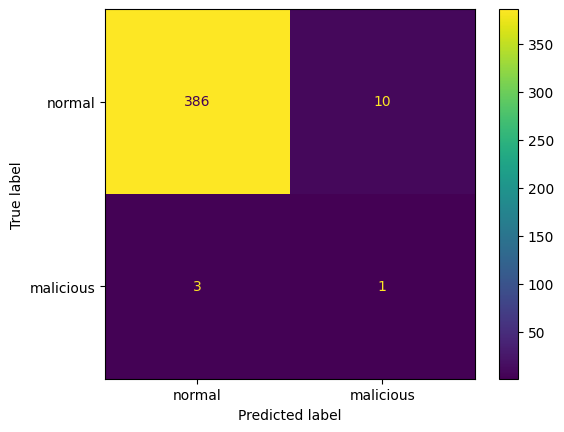

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)

# Evaluate the model
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['normal', 'malicious'])
print("\nClassification Report:\n", classification_report(y_test, y_pred))
disp.plot()
plt.show()

**Hyperparameter Tuning**

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 3, 5],
    # 'criterion': ['gini', 'entropy', 'log_loss'], gini
    # 'splitter': ['best', 'random'], best
    'max_features': ['sqrt', 'log', None],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2], 0
    # 'max_leaf_nodes': [None, 2, 4],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2], 0
    'class_weight': ['balanced', None],
    'ccp_alpha': [0.0, 0.01, 0.2]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_dt = grid_search.best_estimator_
test_score = best_dt.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)


Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9775251953008528
Test Set Score: 0.9675


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python

**Model Evaluation after Tuning**

Accuracy: 96.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       396
           1       0.15      0.50      0.24         4

    accuracy                           0.97       400
   macro avg       0.57      0.74      0.61       400
weighted avg       0.99      0.97      0.98       400



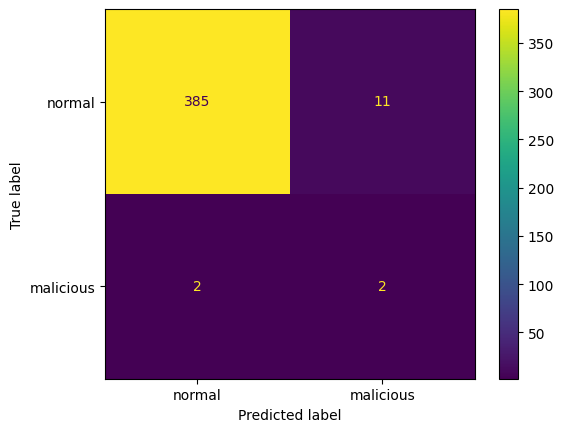

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model
best_dt.fit(X_train_scaled, y_train)
y_pred = best_dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['normal', 'malicious'])
print("\nClassification Report:\n", classification_report(y_test, y_pred))
disp.plot()
plt.show()

**Feature Importance**

<Axes: >

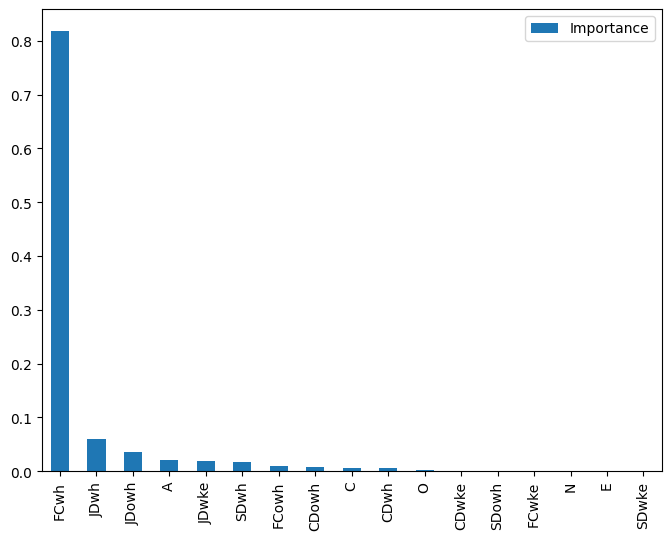

In [10]:
feat_importances = pd.DataFrame(best_dt.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

**Visualise Graph**

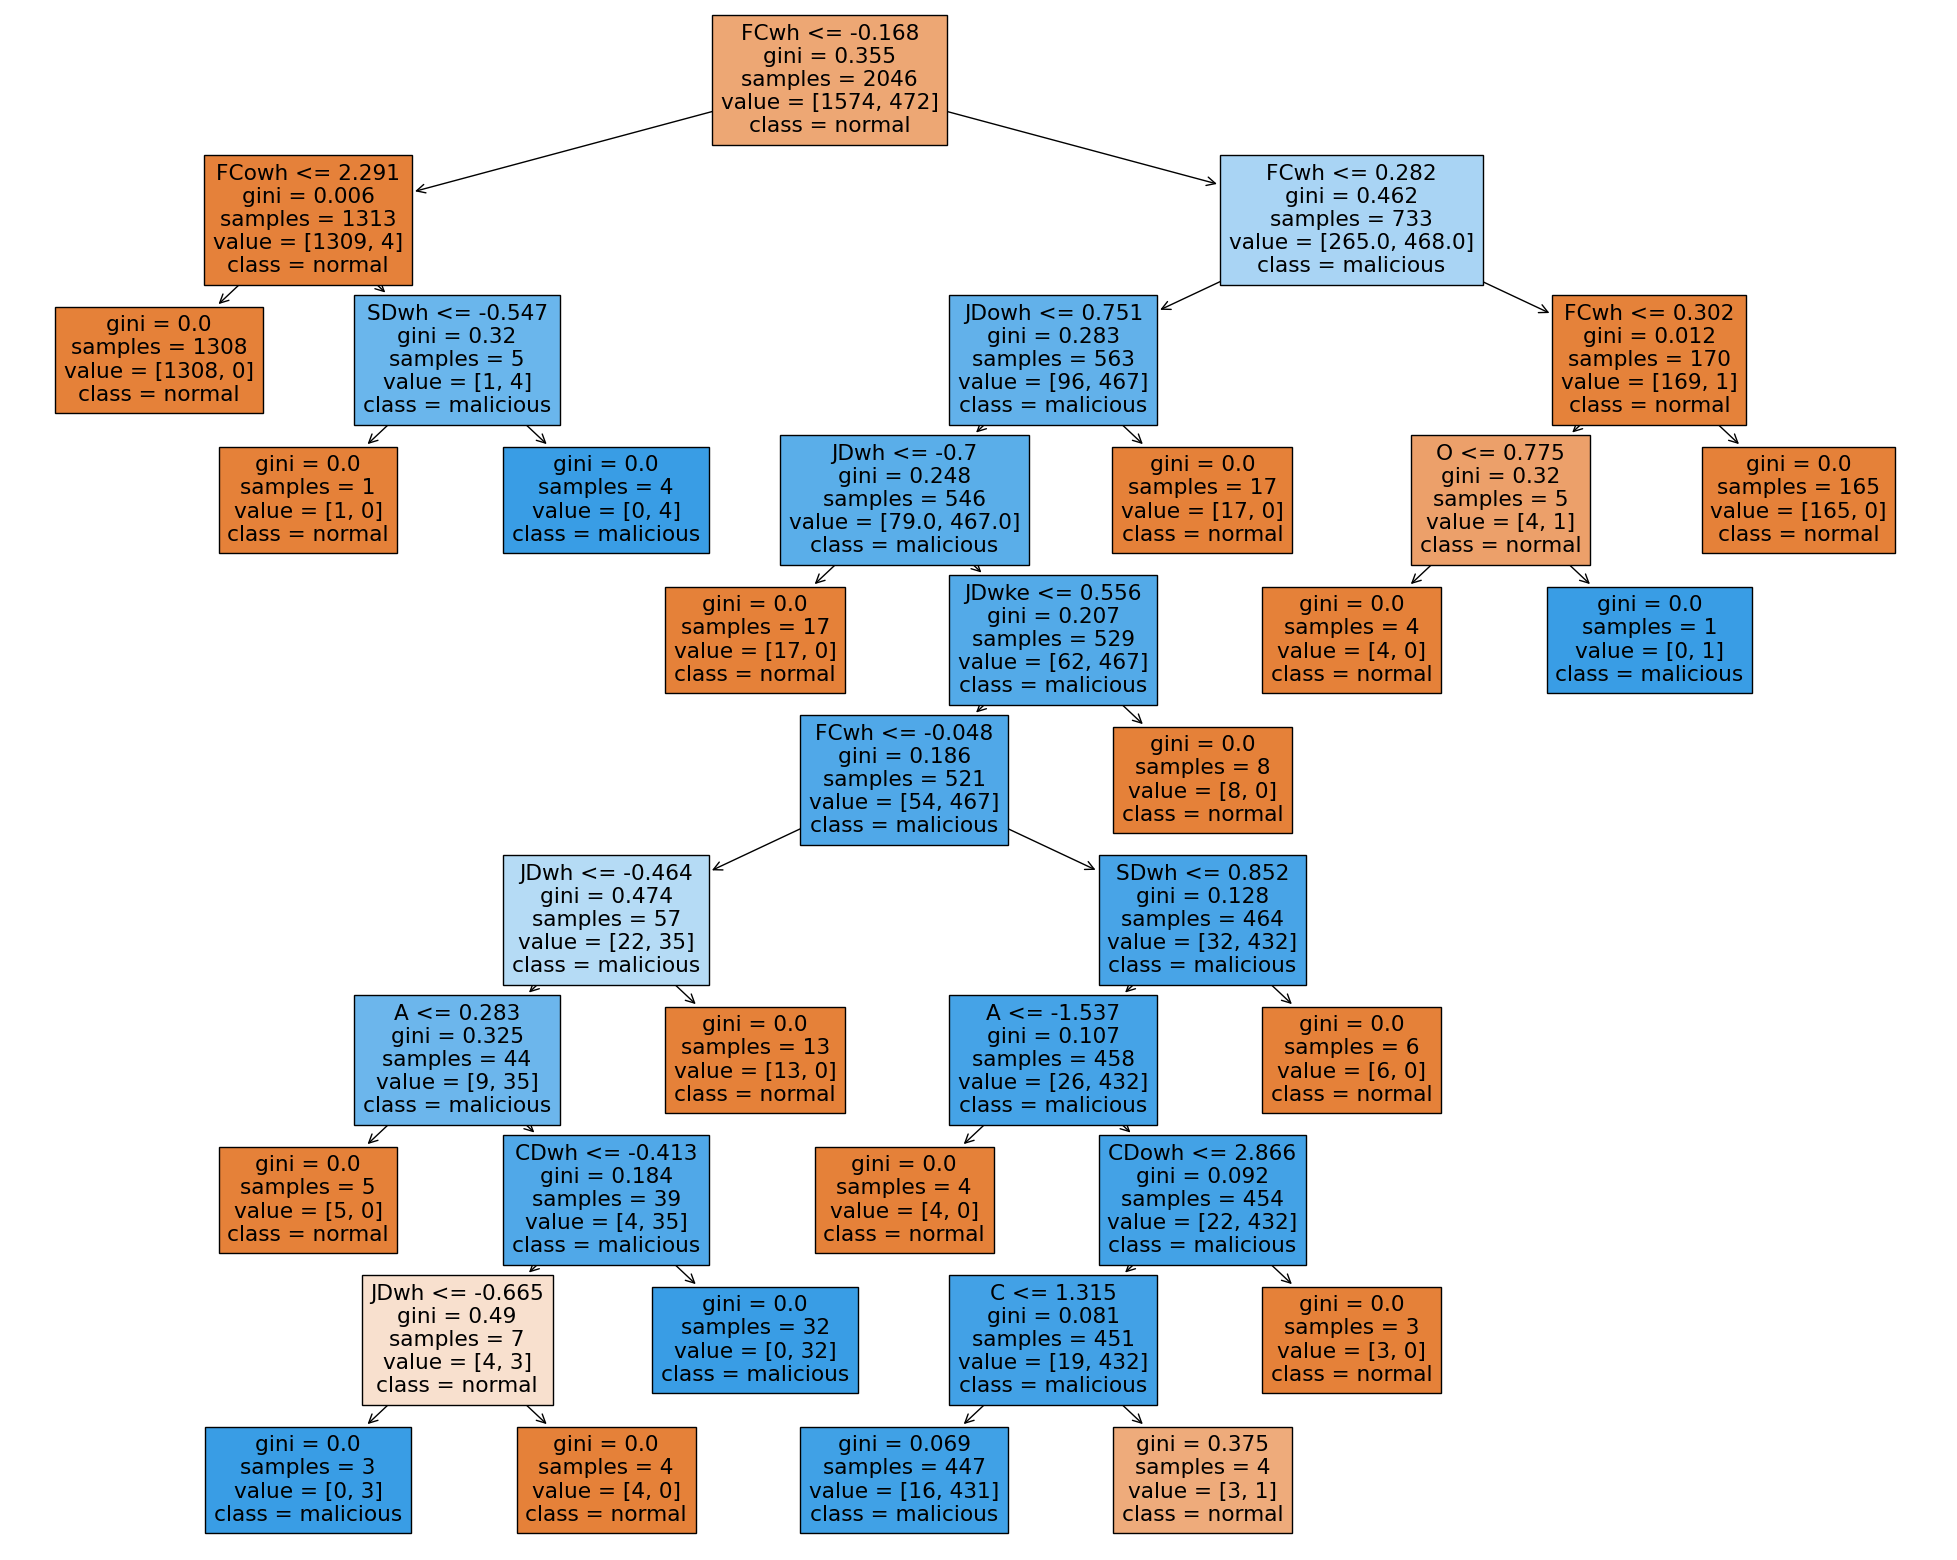

In [11]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dt, 
                   feature_names=X_train.columns.tolist(),  
                   class_names=["normal","malicious"],
                   filled=True)

**Confidence Score: Using Gini**
- A higher impurity indicates a higher risk or uncertainty in the classification decision made by that node. Hence, lower confidence score
- Sum Gini at nodes in decision path, weighted according to number of samples in a node

In [14]:
from sklearn.preprocessing import MinMaxScaler

def get_decision_paths(clf, X):
    node_indicator = clf.decision_path(X)
    decision_paths_matrix = node_indicator.toarray()
    decision_paths_nodes = list([np.where(row == 1)[0].tolist() for row in decision_paths_matrix])

    return decision_paths_nodes
    
def multiply_gini(clf, decision_paths):
    gini_paths = []

    for path in decision_paths:
        gini_nodes = []

        for node in path:
            gini_nodes.append(clf.tree_.n_node_samples[node] * clf.tree_.impurity[node])
        
        gini_paths.append(sum(gini_nodes))

    return np.array(gini_paths).reshape(-1, 1)

def get_confidence_score(clf, decision_paths):
    
    gini = multiply_gini(best_dt, decision_paths)
    scalar = MinMaxScaler(feature_range=(0, 1))
    risk_scores = scalar.fit_transform(gini) # 0 means low risk, 1 means high risk
    confidence_scores = 1 - risk_scores # o means low confidence, 1 means high confidence

    return confidence_scores

[2.22044605e-16 2.79875700e-02 6.41217562e-02 1.04039851e-01
 1.50803764e-01 1.58090286e-01 1.61359192e-01 1.68204337e-01
 1.81855734e-01 2.99913064e-01 4.04282209e-01 5.33128095e-01
 6.81551419e-01 6.83076908e-01 9.98474511e-01 1.00000000e+00]


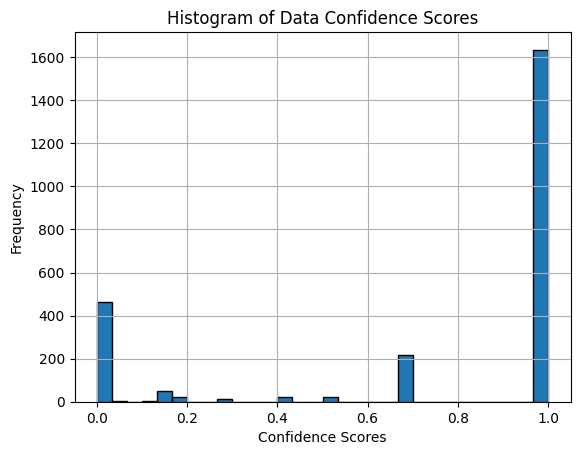

In [15]:
# Combine train and test data sets obtain all risk scores
train_decision_paths = get_decision_paths(best_dt, X_train_scaled)
test_decision_paths = get_decision_paths(best_dt, X_test_scaled)

all_decision_paths = []
all_decision_paths.extend(train_decision_paths)
all_decision_paths.extend(test_decision_paths)

all_confidence_scores = get_confidence_score(best_dt, all_decision_paths)
print(np.unique(all_confidence_scores))

# Plot histogram
plt.hist(all_confidence_scores, bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Confidence Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Data Confidence Scores')
plt.grid(True)
plt.show()

**Study Minority Instances**

Get data of users whose predictions were False

In [16]:
X_test_indices = np.where((y_pred == 0 & y_test == 1))
FN_X_test = X_test.iloc[X_test_indices]
FN_data = data.iloc[FN_X_test.index].reset_index(drop=True)
FN_data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,MEB1743,33,39,18,33,30,0,86,307,0,2,8,0,5,14,0,91,272,0
1,GGD1545,41,37,38,22,25,0,51,225,0,49,119,0,9,29,0,229,672,0
2,KCR1118,36,36,17,25,39,0,121,308,0,6,4,0,0,6,0,16,55,0
3,GBV0440,31,12,10,44,21,0,4,250,0,11,130,0,23,443,0,16,338,0
4,FAJ1122,40,19,38,45,39,0,1037,126,0,3,36,0,2,1,0,6,64,0
5,MCV1046,46,39,27,35,29,0,16,188,0,1,7,0,10,39,0,19,112,0
6,NBL1490,18,15,30,23,22,0,11,254,0,7,239,0,0,0,0,112,2070,0
7,TNB1616,33,38,10,43,29,0,12,61,0,206,605,0,9,15,0,123,248,1
8,EAM1308,40,25,20,16,33,32,58,278,0,10,34,20,38,149,73,152,494,0
9,MKC0869,30,35,20,38,30,0,73,216,0,6,16,0,46,161,0,106,309,0


Get decision paths of each False instance

In [ ]:
FN_decision_paths = get_decision_paths(best_dt, X_test_scaled[X_test_indices])
FN_data['decision_path'] = FN_decision_paths
display(FN_data)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dt, 
                   feature_names=X_train.columns.tolist(),  
                   class_names=["normal","malicious"],
                   node_ids = True)

Get gini coefficient of FN instances

In [ ]:
FN_data['confidence_score'] = get_confidence_score(best_dt, FN_decision_paths)
FN_data

Get probabilities of obtaining False

In [ ]:
FN_prob = best_dt.predict_proba(X_test_scaled[X_test_indices])

# Create a probabilities DataFrame from the array
probs_df = pd.DataFrame(FN_prob, columns=['normal_prob', 'malicious_prob'])

# Concatenate probabilities df to existing FN_data df
FN_data = pd.concat([FN_data, probs_df], axis=1)

FN_data

# Note: Libraries to be Installed

In [ ]:
# %pip install scikit-learn
# %pip install matplotlib
# %pip install imblearn - depends on whether used